In [ ]:
# I will clean this code soon and add comments in it


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/tejan/Desktop/Data_Science_Practice/datasets-master/data/ulabox_orders_with_categories_partials_2017.csv')

In [3]:
df.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [30]:
df.groupby('customer')['total_items' ].sum().reset_index()

,customer,total_items
0,0,134
1,1,623
2,2,26
3,3,639
4,4,496
...,...,...
10234,10234,1
10235,10235,4
10236,10236,1
10237,10237,64


In [ ]:
df.head()

In [ ]:
df.isnull().any().sum()
# no missing values in data set 

In [ ]:
# out;ier cut at 99

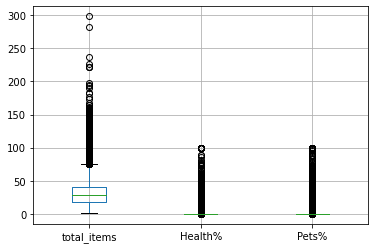

In [31]:
# checking for outliers
df.boxplot(column= ['total_items','Health%' , 'Pets%'])

In [ ]:
# df['total_items'] = np.log(df['total_items'])

In [ ]:
df['total_items'].hist()

In [56]:
df = df.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.95)))

In [ ]:
df.head()

In [32]:
df.drop(['customer', 'order', 'hour'], axis = 1 , inplace = True)

In [ ]:
df.info()

In [57]:
df.describe(percentiles=[.01, .25 , .50, .75, .90 , .95 , .99]).T

,count,mean,std,min,1%,25%,50%,75%,90%,95%,99%,max
total_items,30000.0,30.788133,17.519939,1.0,1.0,18.0000,29.00,41.0000,57.000,70.000000,70.0000,70.0000
discount%,30000.0,7.115061,7.976709,0.0,0.0,1.1775,4.16,9.9900,19.870,28.650150,28.6530,28.6530
weekday,30000.0,3.642367,2.122031,1.0,1.0,2.0000,3.00,5.0000,7.000,7.000000,7.0000,7.0000
Food%,30000.0,22.449527,18.528418,0.0,0.0,7.2200,19.65,33.2600,49.630,65.940050,65.9410,65.9410
Fresh%,30000.0,19.641200,22.193708,0.0,0.0,0.0000,10.93,35.7900,56.192,67.450025,67.4505,67.4505
Drinks%,30000.0,22.418526,19.901809,0.0,0.0,6.7100,17.89,33.1625,53.470,70.200125,70.2025,70.2025
Home%,30000.0,12.555341,14.607629,0.0,0.0,0.0000,7.21,20.0025,36.351,49.170025,49.1705,49.1705
Beauty%,30000.0,4.418519,7.202413,0.0,0.0,0.0000,0.00,6.5125,15.890,25.240000,25.2400,25.2400
Health%,30000.0,0.551184,1.862692,0.0,0.0,0.0000,0.00,0.0000,0.000,7.670000,7.6700,7.6700
Baby%,30000.0,10.272455,21.989758,0.0,0.0,0.0000,0.00,4.1725,45.470,79.130125,79.1325,79.1325


In [ ]:
df.corr().to_csv('C:/Users/tejan/Desktop/corr.csv')

In [ ]:
import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [ ]:
df = df.drop_duplicates()

In [58]:
df.shape

(30000, 11)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df_scale=sc.fit_transform(df)

In [60]:
df_scale.shape

(30000, 11)

In [61]:
from sklearn.decomposition import PCA
pc = PCA(n_components=11)

In [62]:
pc.fit(df_scale)

PCA(n_components=11)

In [63]:
np.around(pc.explained_variance_,2)  #Eigen value

array([1.79, 1.43, 1.28, 1.12, 1.01, 1.01, 0.98, 0.91, 0.75, 0.65, 0.08])

In [64]:
#Cumulative Variance expl
np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

array([ 16.28,  29.26,  40.91,  51.11,  60.27,  69.41,  78.29,  86.56,
        93.42,  99.29, 100.01])

In [65]:
# 7 components through PCA

In [66]:
pc_final=PCA(n_components=7).fit(df_scale)

In [67]:
pc_final.explained_variance_

array([1.79079823, 1.42790759, 1.2816115 , 1.12171319, 1.00785935,
       1.00540917, 0.97629536])

In [68]:
reduced_cr=pc_final.fit_transform(df_scale)  # the out put is Factors (F1, F2, ...F9)

In [69]:
dimensions = pd.DataFrame(reduced_cr)

In [70]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

In [71]:
from sklearn.cluster import KMeans

In [72]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3.fit(dimensions)


KMeans(n_clusters=3, random_state=123)

In [73]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

0    0.4762
1    0.3855
2    0.1383
dtype: float64

In [79]:
km_4=KMeans(n_clusters=4,random_state=123).fit(dimensions)
km_5=KMeans(n_clusters=5,random_state=123).fit(dimensions)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(dimensions)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(dimensions)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(dimensions)

km_9=KMeans(n_clusters=9,random_state=123).fit(dimensions)
km_10=KMeans(n_clusters=10,random_state=123).fit(dimensions)

#km_5.labels_

In [80]:
pd.Series(km_10.labels_).value_counts()/sum(pd.Series(km_10.labels_).value_counts())

8    0.155200
4    0.126133
0    0.111000
3    0.107967
2    0.101033
6    0.097433
1    0.085467
7    0.079767
9    0.077600
5    0.058400
dtype: float64

In [81]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

df['cluster_4'] = km_4.labels_
df['cluster_5'] = km_5.labels_
df['cluster_6'] = km_6.labels_
df['cluster_7'] = km_7.labels_
df['cluster_8'] = km_8.labels_
df['cluster_9'] = km_9.labels_




In [82]:
# calculate SC for K=4
from sklearn import metrics
metrics.silhouette_score(dimensions, km_4.labels_)

0.21047417743465596

In [83]:
# calculate SC for K=3 through K=12
k_range = range(4, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

In [84]:
from matplotlib import pyplot as plt

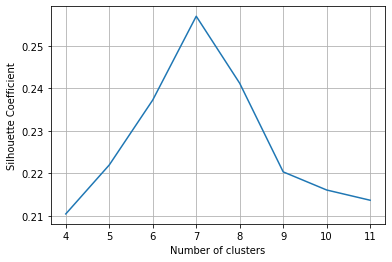

In [85]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [86]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dimensions  )
    cluster_errors.append( clusters.inertia_ )

In [87]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,220346.264228
1,3,191220.811483
2,4,164310.053282
3,5,143204.958084
4,6,125307.113648
5,7,109172.744197
6,8,102009.524841
7,9,97784.094072
8,10,93792.580054
9,11,90104.517685


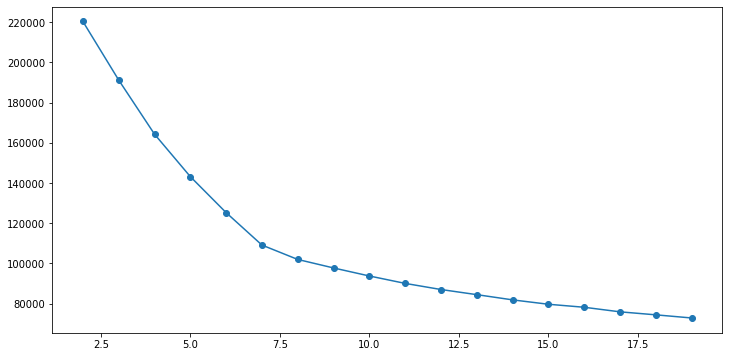

In [88]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [102]:
df.head()

,total_items,discount%,weekday,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,45,23.03,4,9.46,67.4505,3.48,0.00,0.00,0.00,0.0,0.0,0,1,0,5,5,4
1,38,1.22,5,15.87,67.4505,6.22,2.12,0.00,0.00,0.0,0.0,0,1,0,5,5,4
2,51,18.08,4,16.88,56.7500,3.37,16.48,6.53,0.00,0.0,0.0,0,1,0,5,5,4
3,57,16.51,1,28.81,35.9900,11.78,4.62,2.87,7.67,0.0,0.0,0,1,1,0,0,0
4,53,18.31,2,24.13,60.3800,7.78,7.72,0.00,0.00,0.0,0.0,0,1,0,5,5,4


In [106]:
df_mew = df.drop([ 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_9'], axis = 1)

In [107]:
df_mew.head()

,total_items,discount%,weekday,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,cluster_8
0,45,23.03,4,9.46,67.4505,3.48,0.00,0.00,0.00,0.0,0.0,5
1,38,1.22,5,15.87,67.4505,6.22,2.12,0.00,0.00,0.0,0.0,5
2,51,18.08,4,16.88,56.7500,3.37,16.48,6.53,0.00,0.0,0.0,5
3,57,16.51,1,28.81,35.9900,11.78,4.62,2.87,7.67,0.0,0.0,0
4,53,18.31,2,24.13,60.3800,7.78,7.72,0.00,0.00,0.0,0.0,5


In [103]:
df_mew['label'] = km_7.predict(dimensions)

In [125]:
df_mew = df.drop([ 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_8', 'cluster_9'], axis = 1)

In [126]:
df_mew.head()

,total_items,discount%,weekday,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,cluster_7
0,45,23.03,4,9.46,67.4505,3.48,0.00,0.00,0.00,0.0,0.0,5
1,38,1.22,5,15.87,67.4505,6.22,2.12,0.00,0.00,0.0,0.0,5
2,51,18.08,4,16.88,56.7500,3.37,16.48,6.53,0.00,0.0,0.0,5
3,57,16.51,1,28.81,35.9900,11.78,4.62,2.87,7.67,0.0,0.0,0
4,53,18.31,2,24.13,60.3800,7.78,7.72,0.00,0.00,0.0,0.0,5


In [136]:
df_mew[df_mew['cluster_7']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
total_items,2851.0,27.890214,17.779217,1.0,16.000,26.00,38.000,70.0000
discount%,2851.0,5.019610,5.891175,0.0,0.680,3.17,7.220,28.6530
weekday,2851.0,3.600842,2.152417,1.0,2.000,3.00,6.000,7.0000
Food%,2851.0,18.953525,15.414069,0.0,5.690,17.73,28.855,65.9410
Fresh%,2851.0,14.356268,17.117350,0.0,0.000,7.20,26.035,67.4505
Drinks%,2851.0,16.212290,14.885342,0.0,2.755,13.90,24.650,70.2025
Home%,2851.0,9.997661,11.967983,0.0,0.000,6.16,15.470,49.1705
Beauty%,2851.0,12.860095,10.493051,0.0,1.495,11.73,25.240,25.2400
Health%,2851.0,4.726791,3.452627,0.0,0.000,7.26,7.670,7.6700
Baby%,2851.0,4.906213,12.429350,0.0,0.000,0.00,0.000,79.1325


In [ ]:
df_mew.loc[df_mew['cluster_7']==0, 'class'] = 'Home_Products'

In [ ]:
df_mew[df_mew['cluster_7']==6].describe().T

In [ ]:
df_mew.loc[df_mew['cluster_7']==2, 'class'] = 'Fresh_Products'

In [ ]:
df_mew.loc[df_mew['cluster_7']==1, 'class'] = 'Drinks'

In [ ]:
df_mew.loc[df_mew['cluster_7']==3, 'class'] = 'Food'

In [ ]:
df_mew.loc[df_mew['cluster_7']==4, 'class'] = 'Baby_Products'

In [ ]:
df_mew.loc[df_mew['cluster_7']==6, 'class'] = 'Loyal_grocerries'

In [ ]:
df_mew.loc[df_mew['cluster_7']==5, 'class'] = 'Loyals_buy_evrything'

In [ ]:
df_mew['class'].value_counts()

In [ ]:
df_mew.head()

In [ ]:
df_mew.groupby('class')['total_items'].describe()

In [94]:
df_scale.shape

(30000, 11)

In [95]:
df.shape

(30000, 17)

In [98]:
# km_8.predict(df_scale)